In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Set the plot style
pio.templates.default = "plotly_dark"
sns.set_theme('notebook', style='dark')
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [ ]:
dataset = 'https://raw.githubusercontent.com/adibmenchali/electric_cars_project/master/data.csv'
data = pd.read_csv(dataset)
pd.set_option('display.max_columns', None)
df = data.copy()
df.head()

,publishedsince_days,brand,model,Price,year,KMs,Engine,Gear,Color,warranty_months,type of ad,rechargeable,battery_capacity_km,engine_power_kW,battery_volts_V,battery_intensity_A
0,40,AUDI,RS4 (5E GENERATION) AVANT,99930,2020,51751,Petrol,automatic,noir,24,Professional,NaN,NaN,NaN,NaN,NaN
1,30,ASTON MARTIN,V8 VANTAGE,99430,2016,58494,Petrol,automatic,noirmetal,3,Professional,NaN,NaN,NaN,NaN,NaN
2,58,VOLKSWAGEN,TOUAREG 3,99210,2021,11681,Petrol-electric hybrid,automatic,gris,1,Professional,yes,NaN,NaN,NaN,NaN
3,60,AUDI,RS4 (5E GENERATION) AVANT,99080,2019,67276,Petrol,automatic,noir,12,Professional,NaN,NaN,NaN,NaN,NaN
4,10,MASERATI,QUATTROPORTE 6,98380,2018,17611,Petrol,automatic,grismetal,12,Professional,NaN,NaN,316.0,NaN,NaN


In [ ]:
df.columns = df.columns.str.replace(' ', '')
df.isnull().sum()

publishedsince_days       0
brand                     0
model                     0
Price                     0
year                      0
KMs                       0
Engine                    0
Gear                      0
Color                     0
warranty_months           0
typeofad                  0
rechargeable           2207
battery_capacity_km    2291
engine_power_kW        1985
battery_volts_V        2281
battery_intensity_A    2333
dtype: int64

In [ ]:
#df.drop(['rechargeable', 'battery_capacity_km', 'engine_power_kW', 'battery_volts_V', 'battery_intensity_A'],axis=1,inplace=True)
df = df[df['Engine'] != '0']

In [ ]:
df.brand.value_counts()

PEUGEOT         324
BMW             220
RENAULT         214
CITROEN         206
VOLKSWAGEN      197
AUDI            180
MERCEDES        137
PORSCHE          93
OPEL             91
FIAT             72
MINI             69
FORD             59
DS               44
SEAT             41
MAZDA            41
NISSAN           40
TOYOTA           39
VOLVO            36
LAND ROVER       36
KIA              28
HYUNDAI          27
DACIA            26
ALFA             26
JAGUAR           26
SKODA            20
CHEVROLET        13
JEEP             13
DODGE            12
ASTON MARTIN      8
MASERATI          7
FERRARI           7
HONDA             6
SUZUKI            5
LEXUS             5
CUPRA             4
ABARTH            4
SMART             3
TESLA             2
MG                2
SUBARU            2
LOTUS             2
MERCEDES-AMG      2
BENTLEY           1
CHRYSLER          1
Name: brand, dtype: int64

In [ ]:
engine_counts = df['Engine'].value_counts().reset_index()
engine_counts.columns = ['Engine', 'Count']
engine_counts['Color'] = engine_counts['Engine'].apply(lambda x: 'Electric' if 'electric' in x.lower() else 'Non-electric')

# Sort the values by Count and then by Engine
engine_counts = engine_counts.sort_values(by=['Count', 'Engine'], ascending=[False, True])

fig = px.bar(engine_counts, x='Engine', y='Count', color='Color', title='Engine distribution', category_orders={'Engine': engine_counts['Engine']})
fig.show()


In [ ]:
df['Engine'].value_counts()

Diesel                                   1109
Petrol                                   1092
Petrol-electric hybrid                    134
Electric                                   40
Hybrid diesel-electric                     12
Dual fuel petrol LPG                        3
Bi-carbonisation of bioethanol petrol       1
Name: Engine, dtype: int64

In [ ]:
df.KMs.describe()

count      2391.000000
mean      56172.921372
std       48094.129088
min           1.000000
25%       16668.000000
50%       45680.000000
75%       84979.500000
max      399110.000000
Name: KMs, dtype: float64

In [ ]:
df.KMs.quantile([0.08,.09,.1, .15,.2,.3])

0.08      112.2
0.09      574.0
0.10     2165.0
0.15     7669.0
0.20    11600.0
0.30    21780.0
Name: KMs, dtype: float64

In [ ]:
import plotly.express as px

# Calculate average resale price by engine
avg_price_by_engine = df.groupby('Engine')['Price'].mean().reset_index()
avg_price_by_engine = avg_price_by_engine.sort_values('Price', ascending=True)

# Create a list of colors and sizes for each engine type
colors = ['red' if 'electric' in engine.lower() else 'blue' for engine in avg_price_by_engine['Engine']]
sizes = [10 if 'electric' in engine.lower() else 3 for engine in avg_price_by_engine['Engine']]

# Create the scatter plot with the custom colors and sizes
fig = px.scatter(avg_price_by_engine, x='Engine', y='Price', title='Average Resale Price based on Engine', color=colors, size=sizes,labels=dict(color='Type'))

# Set the legend labels
fig.for_each_trace(lambda t: t.update(name='Electric' if t.name == 'red' else 'Non electric'))
# Add a line connecting the points
fig.add_trace(px.line(avg_price_by_engine, x='Engine', y='Price').data[0])

# Sort the graph based on average price
fig.update_layout(xaxis={'categoryorder':'total ascending','tickangle': -45},width=1400,height=600)

fig.show()


In [ ]:
df = df[df['year'] != 0]
#df.year.replace(0,2022,inplace=True)
#sns.displot(df, x="year", kind="kde")

In [ ]:
fig = px.histogram(df, x="KMs", nbins=50, title="Distribution of Used Cars based on Distance Traveled (km)")
fig.update_layout(bargap=0.1, xaxis_title="Distance Traveled")
fig.show()


In [ ]:
# Calculate the average price for each brand and sort in descending order
avg_price_by_brand_and_engine = df.groupby(['brand', 'Engine'])['Price'].mean().reset_index().sort_values(['brand', 'Price'], ascending=[True, False])

# Select the top 20 brands by average price
top_20_brands = avg_price_by_brand_and_engine.groupby('brand').head(1).sort_values('Price', ascending=False).head(20)

# Create a bar chart with the top 20 brands and their average prices, with color coded bars
fig = px.bar(top_20_brands, x='brand', y='Price', title='Top 20 Brands by Average Price and Engine', color='Engine', barmode='group', category_orders={'brand': top_20_brands['brand'], 'Engine': ['electric', 'gas']})

# Change the x-axis tick angle to -45
fig.update_layout(xaxis_tickangle=-45,xaxis_title="Brand",yaxis_title="Average Price")

fig.show()


In [ ]:
df

,publishedsince_days,brand,model,Price,year,KMs,Engine,Gear,Color,warranty_months,typeofad,rechargeable,battery_capacity_km,engine_power_kW,battery_volts_V,battery_intensity_A
0,40,AUDI,RS4 (5E GENERATION) AVANT,99930,2020,51751,Petrol,automatic,noir,24,Professional,NaN,NaN,NaN,NaN,NaN
1,30,ASTON MARTIN,V8 VANTAGE,99430,2016,58494,Petrol,automatic,noirmetal,3,Professional,NaN,NaN,NaN,NaN,NaN
2,58,VOLKSWAGEN,TOUAREG 3,99210,2021,11681,Petrol-electric hybrid,automatic,gris,1,Professional,yes,NaN,NaN,NaN,NaN
3,60,AUDI,RS4 (5E GENERATION) AVANT,99080,2019,67276,Petrol,automatic,noir,12,Professional,NaN,NaN,NaN,NaN,NaN
4,10,MASERATI,QUATTROPORTE 6,98380,2018,17611,Petrol,automatic,grismetal,12,Professional,NaN,NaN,316.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,OPEL,CORSA 5,10240,2017,13580,Petrol,mechanic,gris,6,Professional,NaN,NaN,NaN,NaN,NaN
2388,20,TOYOTA,AYGO 2,10200,2020,30731,Petrol,mechanic,blanc,6,Professional,NaN,NaN,NaN,NaN,NaN
2389,21,BMW,SERIE 1 E87 5 PORTES,10130,2010,179331,Diesel,mechanic,noirmetal,6,Professional,NaN,NaN,105.0,NaN,NaN
2390,60,OPEL,ASTRA 4 BERLINE,10060,2015,120038,Diesel,mechanic,gris,12,Professional,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = px.histogram(df, x="publishedsince_days", nbins=20, title='Histogram of publishedsince_days')
fig.update_layout( bargap=0.1, xaxis_title="Published since (days)")
fig.show()

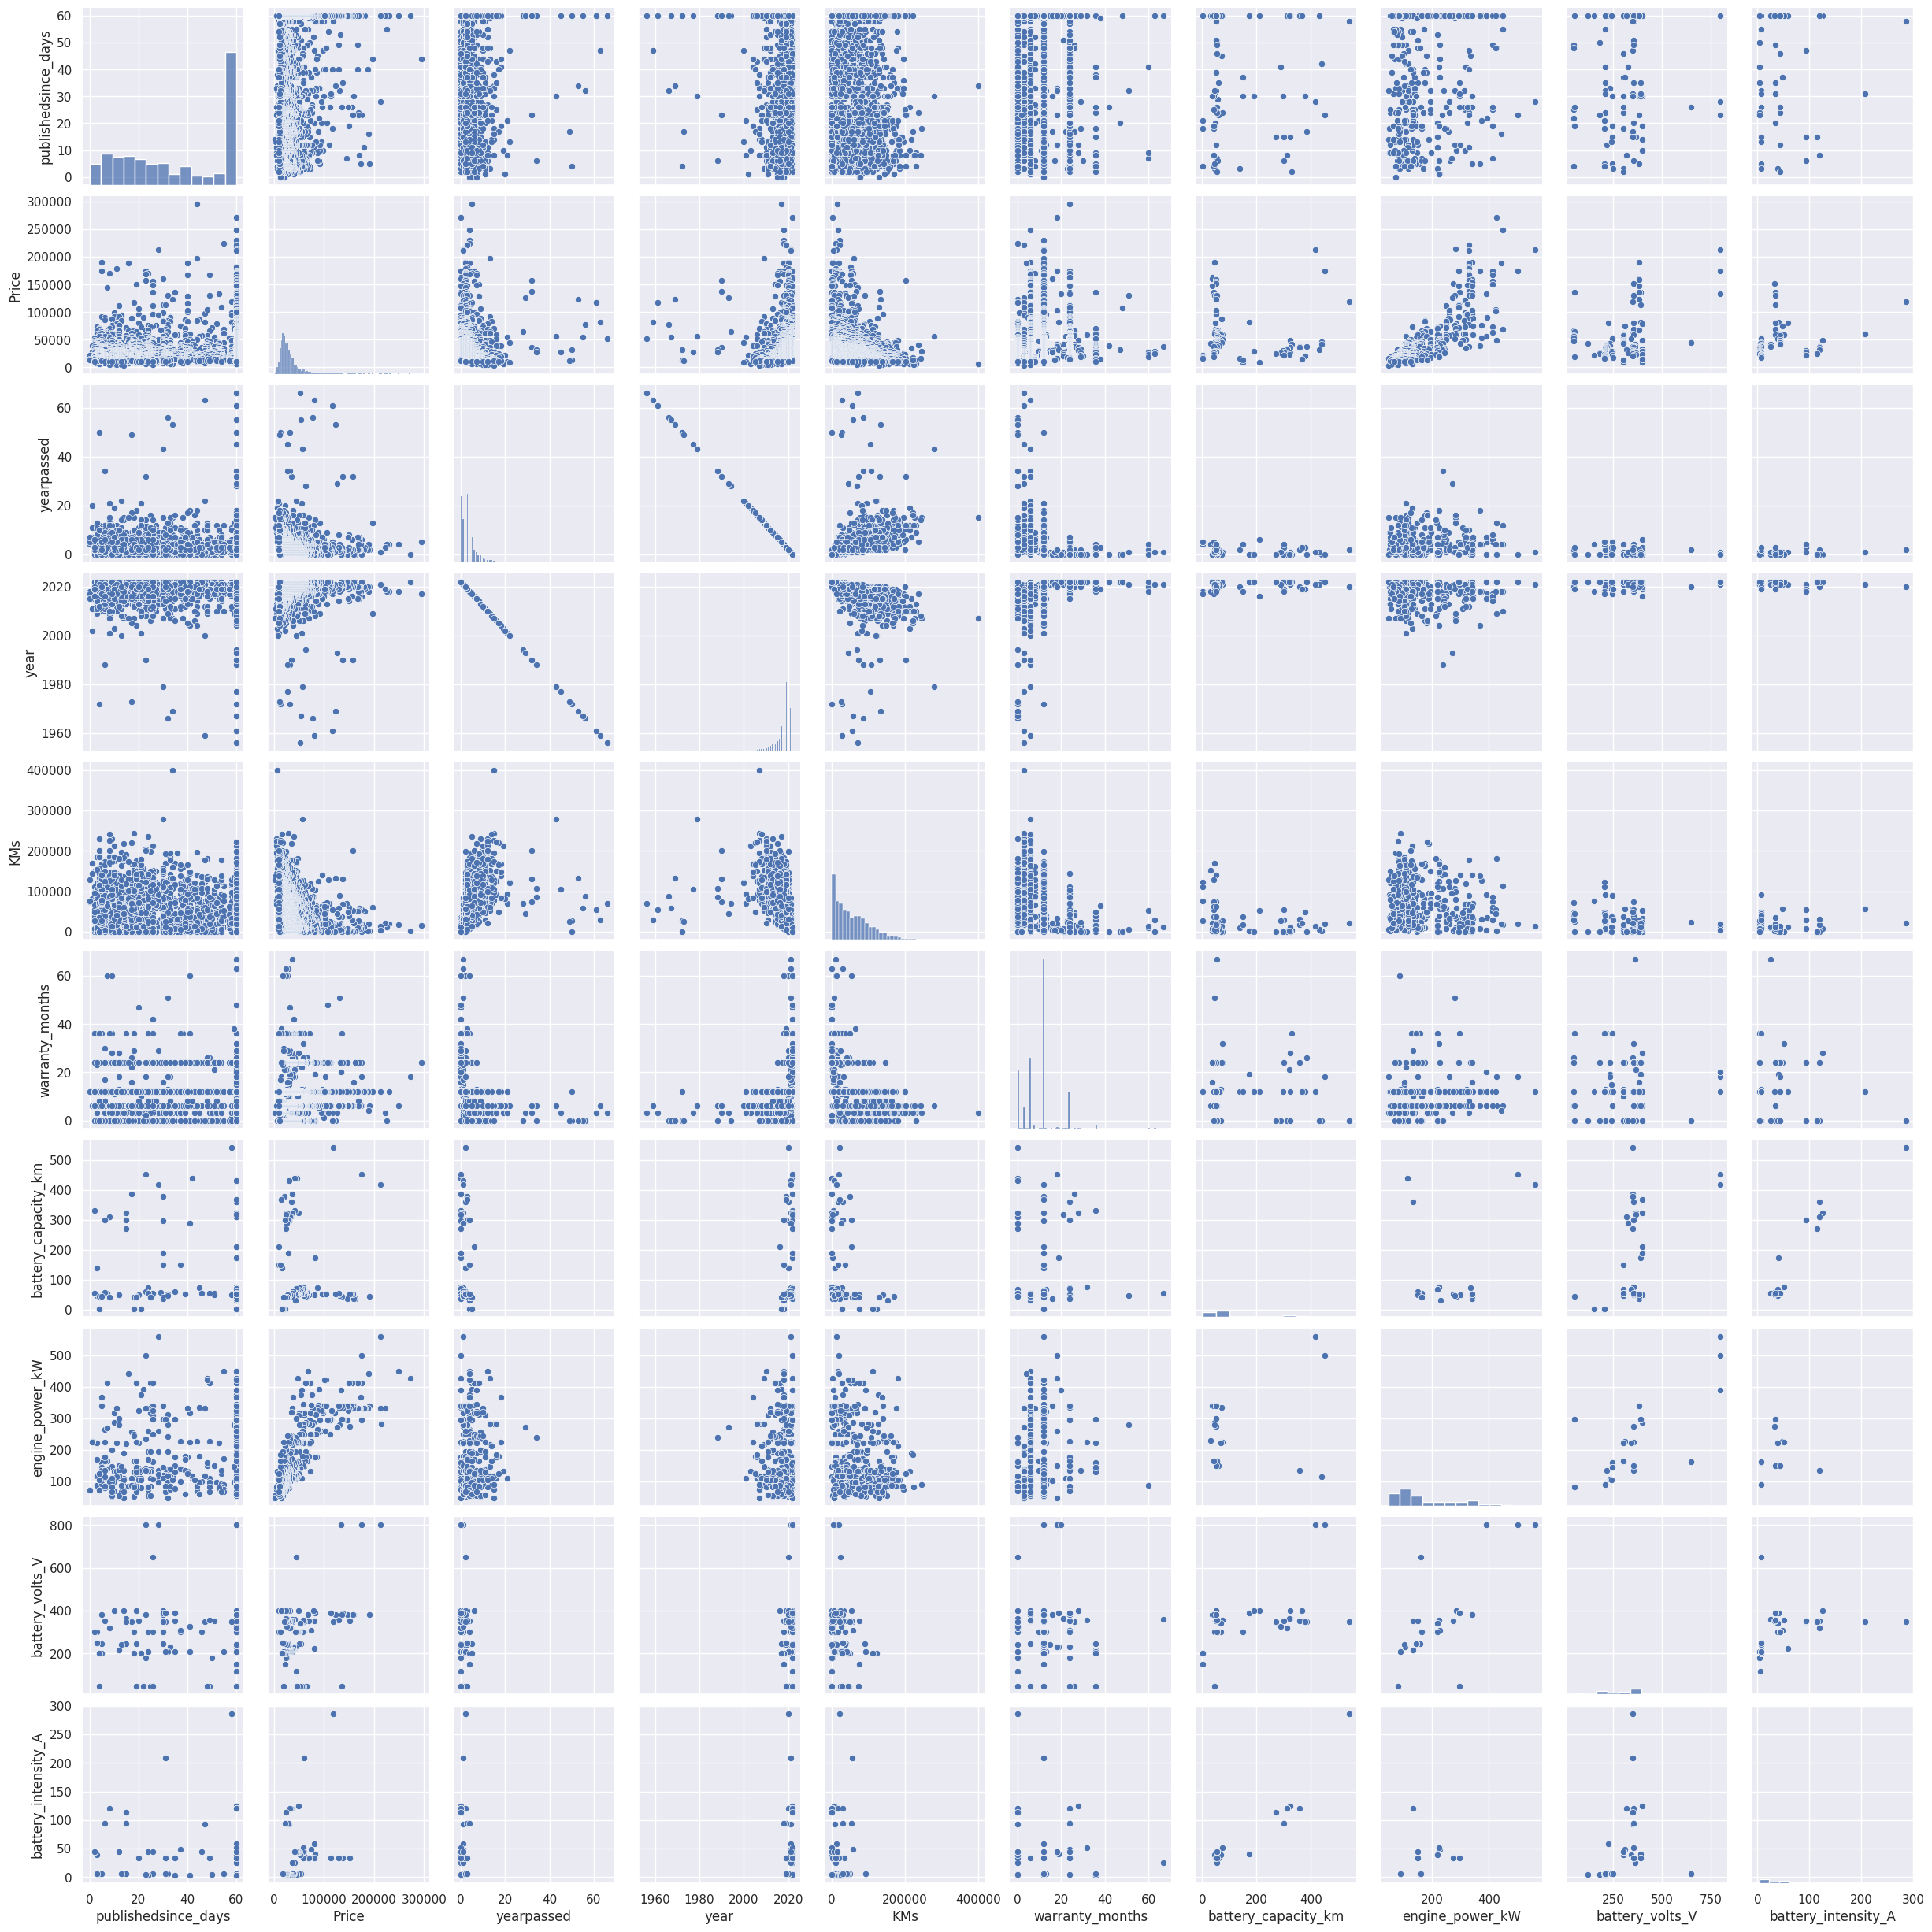

In [ ]:
sns.set(rc={'figure.figsize':(40, 35)})

sns.pairplot(df)

In [ ]:
import numpy as np
from scipy import stats
df.insert(loc=4, column='yearpassed', value=df.year.max() - df.year)
df.insert(loc=5, column='syntheticprice', value=None)

df.loc[df["KMs"] < 2100, "syntheticprice"] = np.ceil(df.Price+np.log(df.KMs)*1000*np.exp(df.yearpassed))

In [ ]:
df.loc[df['syntheticprice'].notnull()].head(20)

,publishedsince_days,brand,model,Price,yearpassed,syntheticprice,year,KMs,Engine,Gear,Color,warranty_months,typeofad,rechargeable,battery_capacity_km,engine_power_kW,battery_volts_V,battery_intensity_A
11,60,JEEP,GLADIATOR,94250,0,97429.0,2022,24,Petrol,automatic,blancverni,12,Professional,NaN,NaN,NaN,NaN,NaN
69,60,FIAT,DUCATO 3,81840,0,88963.0,2022,1240,Electric,automatic,grisclair,19,Professional,yes,174.0,NaN,389.0,41.0
70,60,DODGE,RAM,81640,0,84732.0,2022,22,Bi-carbonisation of bioethanol petrol,automatic,grisfoncã©metal,12,Professional,NaN,NaN,NaN,NaN,NaN
115,60,DODGE,RAM,71970,0,75015.0,2022,21,Petrol,automatic,blancverni,24,Professional,NaN,NaN,295.0,NaN,NaN
116,50,VOLVO,S60 (3E GENERATION),71560,0,73958.0,2022,11,Petrol-electric hybrid,automatic,blanccristalmã©tallisã©,24,Professional,yes,NaN,NaN,NaN,NaN
118,60,VOLKSWAGEN,GOLF 8 GTI,71120,0,77964.0,2022,938,Petrol,automatic,noirmetal,36,Professional,NaN,NaN,221.0,NaN,NaN
149,60,VOLVO,XC60 (2E GENERATION),69000,1,75755.0,2021,12,Petrol-electric hybrid,automatic,osmiumgrey,0,Professional,yes,NaN,NaN,NaN,NaN
169,16,ALFA,ROMEO GIULIA 2,65530,0,68015.0,2022,12,Petrol,automatic,noirvolcano,0,Professional,NaN,NaN,NaN,NaN,NaN
176,60,PEUGEOT,3008 (2E GENERATION),64480,1,77131.0,2021,105,Petrol-electric hybrid,automatic,blanc,24,Professional,yes,NaN,NaN,NaN,NaN
200,24,DS,7 CROSSBACK,60400,0,62798.0,2022,11,Petrol-electric hybrid,automatic,noir,0,Professional,yes,55.0,NaN,300.0,44.0


In [ ]:
#Inserting the synthetic prices and appending it to our electric cars dataframe
df0 = pd.read_csv("https://raw.githubusercontent.com/adibmenchali/electric_cars_project/master/data0.csv")

#Filtering electric cars, we decided to include these 3 categories to have a decent sample size 'Electric','Petrol-electric hybrid','Hybrid diesel-electric'.
e_categories = ['Electric','Petrol-electric hybrid','Hybrid diesel-electric']
df_electric = df[df['Engine'].isin(e_categories)]
df_electric.sort_values(by=['brand', 'model'], inplace=True)
df_electric.reset_index(drop=True,inplace=True)
df_electric.insert(loc=5, column='price0', value=df0.Price0)
df_electric.insert(loc=6, column='originalprice', value=df_electric.loc[:, ["syntheticprice","price0"]].mean(axis = 1))

In [ ]:
df_electric.insert(loc=7, column='depreciation', value=df_electric.originalprice - df_electric.Price)
df_electric = df_electric.dropna(subset=['depreciation'])
df_electric = df_electric[df_electric['depreciation']>0]

In [ ]:
df_electric.head()

,publishedsince_days,brand,model,Price,yearpassed,price0,originalprice,depreciation,syntheticprice,year,KMs,Engine,Gear,Color,warranty_months,typeofad,rechargeable,battery_capacity_km,engine_power_kW,battery_volts_V,battery_intensity_A
0,12,AUDI,A3 (3E GENERATION) SPORTBACK,41460,1,50720.0,50720.0,9260.0,None,2021,14225,Petrol-electric hybrid,automatic,blancmetal,18,Professional,yes,NaN,150.0,NaN,44.0
3,23,AUDI,Q5 (2E GENERATION),68200,1,70000.0,70000.0,1800.0,None,2021,29698,Petrol-electric hybrid,automatic,noirmythic,24,Professional,yes,NaN,NaN,381.0,NaN
4,32,AUDI,Q8,130780,1,131000.0,131000.0,220.0,None,2021,6240,Petrol-electric hybrid,automatic,grismetal,51,Professional,yes,46.0,280.0,NaN,NaN
5,60,BMW,I3,37470,2,39000.0,39000.0,1530.0,None,2020,18044,Electric,automatic,fluidblack,24,Professional,yes,359.0,NaN,353.0,120.0
6,60,BMW,I3,35530,2,39000.0,39000.0,3470.0,None,2020,30230,Electric,automatic,fluidblackpourblack,24,Professional,yes,359.0,135.0,352.0,120.0


In [ ]:
# Calculate the average depreciation for each brand and year passed
avg_depreciation_by_brand_and_year = df_electric.groupby(['Engine', 'yearpassed'])['depreciation'].mean().reset_index()

# Filter the dataframe to only include values up to yearpassed=4
filtered_df = avg_depreciation_by_brand_and_year[avg_depreciation_by_brand_and_year['yearpassed'] <= 4]

# Select the top 10 brands by average depreciation
top_10_brands = filtered_df.groupby('Engine').mean().sort_values('depreciation', ascending=False).head(10).reset_index()['Engine']

# Filter the dataframe to only include the top 10 brands
filtered_df = filtered_df[filtered_df['Engine'].isin(top_10_brands)]

# Create a line chart with the average depreciation over years for the top 10 brands, with color coded lines by brand
fig = px.line(filtered_df, x='yearpassed', y='depreciation', color='Engine', title='Average yearly depreciation per Engine')
fig.update_layout(xaxis_title="Years Passed",yaxis_title="Average Depreciation")
fig.show()


In [ ]:
# Calculate the average depreciation for each brand and year passed
avg_depreciation_by_brand_and_year = df_electric.groupby(['brand', 'yearpassed'])['depreciation'].mean().reset_index()

# Filter the dataframe to only include values up to yearpassed=4
filtered_df = avg_depreciation_by_brand_and_year[avg_depreciation_by_brand_and_year['yearpassed'] <= 4]

# Select the top 10 brands by average depreciation
top_10_brands = filtered_df.groupby('brand').mean().sort_values('depreciation', ascending=False).head(10).reset_index()['brand']

# Filter the dataframe to only include the top 10 brands
filtered_df = filtered_df[filtered_df['brand'].isin(top_10_brands)]

# Create a line chart with the average depreciation over years for the top 10 brands, with color coded lines by brand
fig = px.line(filtered_df, x='yearpassed', y='depreciation', color='brand', title='Average Yearly Depreciation by Brand')
fig.update_layout(xaxis_title="Years Passed",yaxis_title="Average Depreciation")
fig.show()


In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.io as pio

pio.templates.default = "plotly_dark"

df_electric = df_electric[df_electric['depreciation'] < df_electric['depreciation'].quantile(0.95)]
df_electric = df_electric.sort_values(by='depreciation')

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_electric[['depreciation']])

if kmeans.cluster_centers_[1] > kmeans.cluster_centers_[0]:
    df_electric['SUV/GT'] = kmeans.labels_
    df_electric['SUV/GT'] = df_electric['SUV/GT'].apply(lambda x: 'SUV' if x == 0 else 'GT')
else:
    df_electric['SUV/GT'] = kmeans.labels_
    df_electric['SUV/GT'] = df_electric['SUV/GT'].apply(lambda x: 'GT' if x == 0 else 'SUV')

# update the colors dictionary to reflect the labels for the clusters
colors = {'GT': 'crimson', 'SUV': 'lightblue'}

df_electric['color'] = df_electric['SUV/GT'].apply(lambda x: colors[x])

fig = px.scatter(df_electric, x=df_electric.index, y='depreciation', color='SUV/GT',
                 color_discrete_map={'SUV': 'lightblue', 'GT': 'crimson'},
                 labels={'x': 'Index', 'depreciation': 'Depreciation'},
                 title='Electric Car Depreciation by Type (SUV or GT)')
fig.show()


In [ ]:
#This doesn't take 2022 into account
'''grouped = df_electric[df_electric['year'] >= 2019].groupby(['SUV/GT','year','Price']).mean()['depreciation'].reset_index()
grouped['years_passed'] = 2023.0 - grouped['year']
grouped['depreciation_rate'] = grouped['depreciation'] / grouped['Price'] * 100 / grouped['years_passed']

# Calculate average depreciation rate per year for GT and SUV cars
average_depreciation_rate_GT = grouped[(grouped['year']!=2022) & (grouped['SUV/GT']=='GT')]['depreciation_rate'].mean()
average_depreciation_rate_SUV = grouped[(grouped['year']!=2022) & (grouped['SUV/GT']=='SUV')]['depreciation_rate'].mean()

print(f"Average depreciation rate per year for GT cars is {average_depreciation_rate_GT:.2f}%")
print(f"Average depreciation rate per year for SUV cars is {average_depreciation_rate_SUV:.2f}%")
'''

Average depreciation rate per year for GT cars is 13.77%
Average depreciation rate per year for SUV cars is 4.85%


In [ ]:
grouped = df_electric[df_electric['year'] >= 2019].groupby(['SUV/GT','year','Price']).mean()['depreciation'].reset_index()
grouped['years_passed'] = 2023.0 - grouped['year']
grouped['depreciation_rate'] = grouped['depreciation'] / grouped['Price'] * 100 / grouped['years_passed']

# Calculate average depreciation rate per year for GT and SUV cars
average_depreciation_rate_GT = grouped[(grouped['SUV/GT']=='GT')]['depreciation_rate'].mean()
average_depreciation_rate_SUV = grouped[(grouped['SUV/GT']=='SUV')]['depreciation_rate'].mean()

print(f"Average depreciation rate per year for GT cars is {average_depreciation_rate_GT:.2f}%")
print(f"Average depreciation rate per year for SUV cars is {average_depreciation_rate_SUV:.2f}%")


Average depreciation rate per year for GT cars is 18.51%
Average depreciation rate per year for SUV cars is 7.84%


In [ ]:
grouped_by_years_passed = grouped.groupby(['SUV/GT', 'years_passed'])['depreciation_rate'].mean().reset_index()
grouped_by_years_passed

,SUV/GT,years_passed,depreciation_rate
0,GT,1.0,28.397839
1,GT,2.0,12.767186
2,GT,3.0,14.916762
3,GT,4.0,14.794129
4,SUV,1.0,10.983554
5,SUV,2.0,5.516852
6,SUV,3.0,3.843672
7,SUV,4.0,4.147991


In [ ]:
"""depreciation_2015 = grouped['depreciation'][0] + (grouped['depreciation'][1] - grouped['depreciation'][0]) / (grouped['year'][1] - grouped['year'][0]) * (2015 - df['year'][0])

# Add estimated depreciation to DataFrame
grouped = grouped.append({'year': 2015, 'depreciation': depreciation_2015}, ignore_index=True)

# Sort DataFrame by year
grouped = grouped.sort_values('year')

# Calculate average yearly depreciation rate
avg_depreciation_rate = (grouped['depreciation'].iloc[-1] / grouped['depreciation'].iloc[0]) ** (1 / (grouped['year'].iloc[-1] - grouped['year'].iloc[0]))

print(avg_depreciation_rate)"""

"depreciation_2015 = grouped['depreciation'][0] + (grouped['depreciation'][1] - grouped['depreciation'][0]) / (grouped['year'][1] - grouped['year'][0]) * (2015 - df['year'][0])\n\n# Add estimated depreciation to DataFrame\ngrouped = grouped.append({'year': 2015, 'depreciation': depreciation_2015}, ignore_index=True)\n\n# Sort DataFrame by year\ngrouped = grouped.sort_values('year')\n\n# Calculate average yearly depreciation rate\navg_depreciation_rate = (grouped['depreciation'].iloc[-1] / grouped['depreciation'].iloc[0]) ** (1 / (grouped['year'].iloc[-1] - grouped['year'].iloc[0]))\n\nprint(avg_depreciation_rate)"

##Action Plan

Using the formula A = P(1-r)^t, where A is the depreciated price, P is the original price, r is the annual depreciation rate, and t is the number of years, we can calculate the value of the SUV after 4 years with annual compounding:

P (SUV after depreciation) = 90000 * (1 - 0.0784/1)^(1*4) = €64,925

Similarly, for the GT:

The initial value is €200,000
The annual depreciation rate is 18.51%, which can be expressed as 0.1851
The number of years is 4
Using the same formula, we can calculate the value of the GT after 4 years with annual compounding:

P (GT after depreciation) = 200000 * (1 - 0.1851/1)^(1*4) = €88,200

So after 4 years, the SUV will be worth €64,925 and the GT will be worth €88,200.

Total cost of refurbishing and selling a used car with a 5% profit margin for SUV = €15,000 + €64,925 = €79,925

Revenue from selling the used SUV = (€79,925) * 1.05 = €83,921

Similarly, the formula for the GT would be:

Total cost of refurbishing and selling a used car with a 5% profit margin for GT = €25,000 + €€88,200 = €113,200

Revenue from selling the used GT = (€113,200) * 1.05 = €118,860

Based on the prices of the refurbished models, we can see that depreciating the SUV cars for 4 years at an annual rate of 7.84% is not enough if the company needs to operate with a 5% profit margin because there is no incentive for a customer to buy a refurbished car for €83,920 when they can buy the new one for €90,000.

For the GT car, however, with an annual depreciation rate of 18.51%. Customers would have enough incentive to buy the refurbished cars at 60% the price of a new one and the company is able to make profit as long as they can guarantee the sale of the refurbished cars.